# Data Cleaning and EDA for Numeric Columns

**Basic imports**

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display

from scipy import stats

from collections import Counter

pd.set_option('display.max_columns', None)

**Additional Imports**

In [2]:
from IPython.display import display, HTML

**Load the data**

In [3]:
inputFile='../../data/smallData/tmp/AcceptedLoans.csv'
data=pd.read_csv(inputFile)
data.head()

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,15-Jan,171.62,NaN,18-Oct,0.0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,13-Apr,119.66,NaN,16-Oct,0.0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,14-Jun,649.91,NaN,17-Jun,

**Check Data Types**

In [4]:
types = data.dtypes
types.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

**Get Numeric Columns**

In [5]:
num_cols = types[(types == 'float64') | (types == 'int64') ]
num_cols

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
installment                                   float64
annual_inc                                    float64
url                                           float64
dti                                           float64
delinq_2yrs                                     int64
inq_last_6mths                                  int64
mths_since_last_delinq                        float64
mths_since_last_record                        float64
open_acc                                        int64
pub_rec                                         int64
revol_bal                                       int64
total_acc                                       int64
out_prncp                                     float64
out_prncp_inv               

In [6]:
numeric_data = data[num_cols.index]
non_numeric_data = data.drop(num_cols.index, axis = 1)

In [7]:
len(numeric_data.columns)

107

## CLEAN THE NUMERIC FEATURES

First we look at summary statistics and missing values.

In [8]:
numeric_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,103496.00000,103496.000000,103496.000000,103496.000000,1.034960e+05,0.0,103327.000000,103496.000000,103496.000000,41786.000000,11775.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103496.000000,103440.000000,14650.00000,103496.0,9.823000e+03,9823.000000,103496.000000,6.371000e+04,6.371000e+04,63710.000000,63710.000000,63710.000000,63710.000000,61079.000000,63710.000000,52991.000000,63710.000000,63710.000000,63710.000000,63695.000000,6.371000e+04,63710.000000,63710.000000,63710.000000,63710.000000,63704.000000,62815.000000,62790.000000,103440.000000,103496.000000,61079.000000,63710.000000,63710.000000,63710.000000,63710.000000,62869.000000,12532.000000,55812.000000,18110.000000,63710.000000,63710.000000,63710.00000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,61670.0,63710.000000,63710.000000,63710.000000,63710.000000,62813.000000,102799.000000,103457.000000,6.371000e+04,6.371000e+04,63710.000000,63710.000000,9823.000000,9823.00000,9823.000000,9823.000000,9624.000000,9823.000000,9823.000000,9823.000000,9823.000000,3252.000000,1.0,1.00,1.0,1.0,1.00,1.00,1.00,159.000000,159.000000,159.000000
mean,NaN,NaN,14266.61900,14161.811326,13948.464131,414.305932,7.463678e+04,NaN,17.271335,0.194433,0.616149,36.660006,77.227431,10.591153,0.122295,15006.798582,22.406740,8345.604653,8343.912106,6771.521128,6545.521965,5357.966988,1374.858362,0.672695,38.023114,5.006131,1824.099767,0.010354,46.20157,1.0,1.246879e+05,19.549071,0.000097,3.657829e+02,1.426320e+05,0.902182,2.617658,0.654418,1.493674,21.680398,34344.398572,67.723047,1.248093,2.649364,5797.739444,53.638072,3.814851e+04,1.059598,1.455392,1.979689,4.424141,13710.371908,15267.702237,49.365799,0.004273,0.885590,122.923542,179.532852,15.050604,8.767446,1.391006,25.343428,40.790057,7.406991,37.974765,0.451546,3.575153,5.28140,4.842175,7.204505,8.004929,8.115492,13.006027,5.232036,11.376958,0.0,0.000141,0.059645,2.035002,94.670052,32.759338,0.092764,0.025257,1.838251e+05,5.060598e+04,26731.269471,44731.443243,34088.442940,0.63728,1.554820,11.498626,58.160204,2.918966,12.640029,0.0594

Observations:
- some columns are entirely missing or have one entry
- some columns contain a single value
- some columns have large outliers

**Missing Values**

We'll need to consider missing values in general, but for now, we'll drop all columns that are entirely missing or have one entry.

In [9]:
col_before = len(numeric_data.columns)
col_not_missing = numeric_data.isna().sum() < (len(numeric_data) - 1)
numeric_data = numeric_data.loc[:,col_not_missing]
col_after = len(numeric_data.columns)

print("columns dropped:", col_before-col_after)

columns dropped: 10


**Columns that Contain Single Value**

Are there any columns remaining with a single value?

In [10]:
numeric_data.loc[:,numeric_data.nunique() == 1]

,policy_code,num_tl_120dpd_2m
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
5,1,NaN
6,1,NaN
7,1,NaN
8,1,NaN
9,1,NaN


In [11]:
numeric_data.nunique()[numeric_data.nunique() == 1]

policy_code         1
num_tl_120dpd_2m    1
dtype: int64

These columns should be dropped

In [12]:
numeric_data = numeric_data.drop(numeric_data.nunique()[numeric_data.nunique() == 1].index, axis = 1)

**Large Outliers**

We are looking for outliers that may indicate incorrect data. We will use a Z-score to identify outliers. However, since our dataset is large, we should expect to see quite a bit of deviation from the mean. To set the z-score threshold, we find the maximum value of 103496 draws from a standard normal across 1000 simulations.

In [13]:
threshold = np.max(np.max(np.random.normal(size = (103496*1000))))
threshold

5.714096835438997

In [14]:
outliers = np.abs(stats.zscore(numeric_data)) > threshold

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Which column has outliers?

In [15]:
outlier_cols = numeric_data.columns[outliers.sum(axis = 0) > 0]
pd.DataFrame({'column_name': numeric_data.columns, 
             'number_of_outliers':outliers.sum(axis = 0)
            })

,column_name,number_of_outliers
0,loan_amnt,0
1,funded_amnt,0
2,funded_amnt_inv,0
3,installment,0
4,annual_inc,163
5,dti,0
6,delinq_2yrs,668
7,inq_last_6mths,114
8,mths_since_last_delinq,0
9,mths_since_last_record,0


Let's see the distribution of the columns with outliers along with the column discription from the data dictionary

In [16]:
data_dict_df = pd.read_csv('../../data/AcceptedDataDictionary.csv')

In [17]:
data_dict = dict(zip(data_dict_df.LoanStatNew, data_dict_df.Description))

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


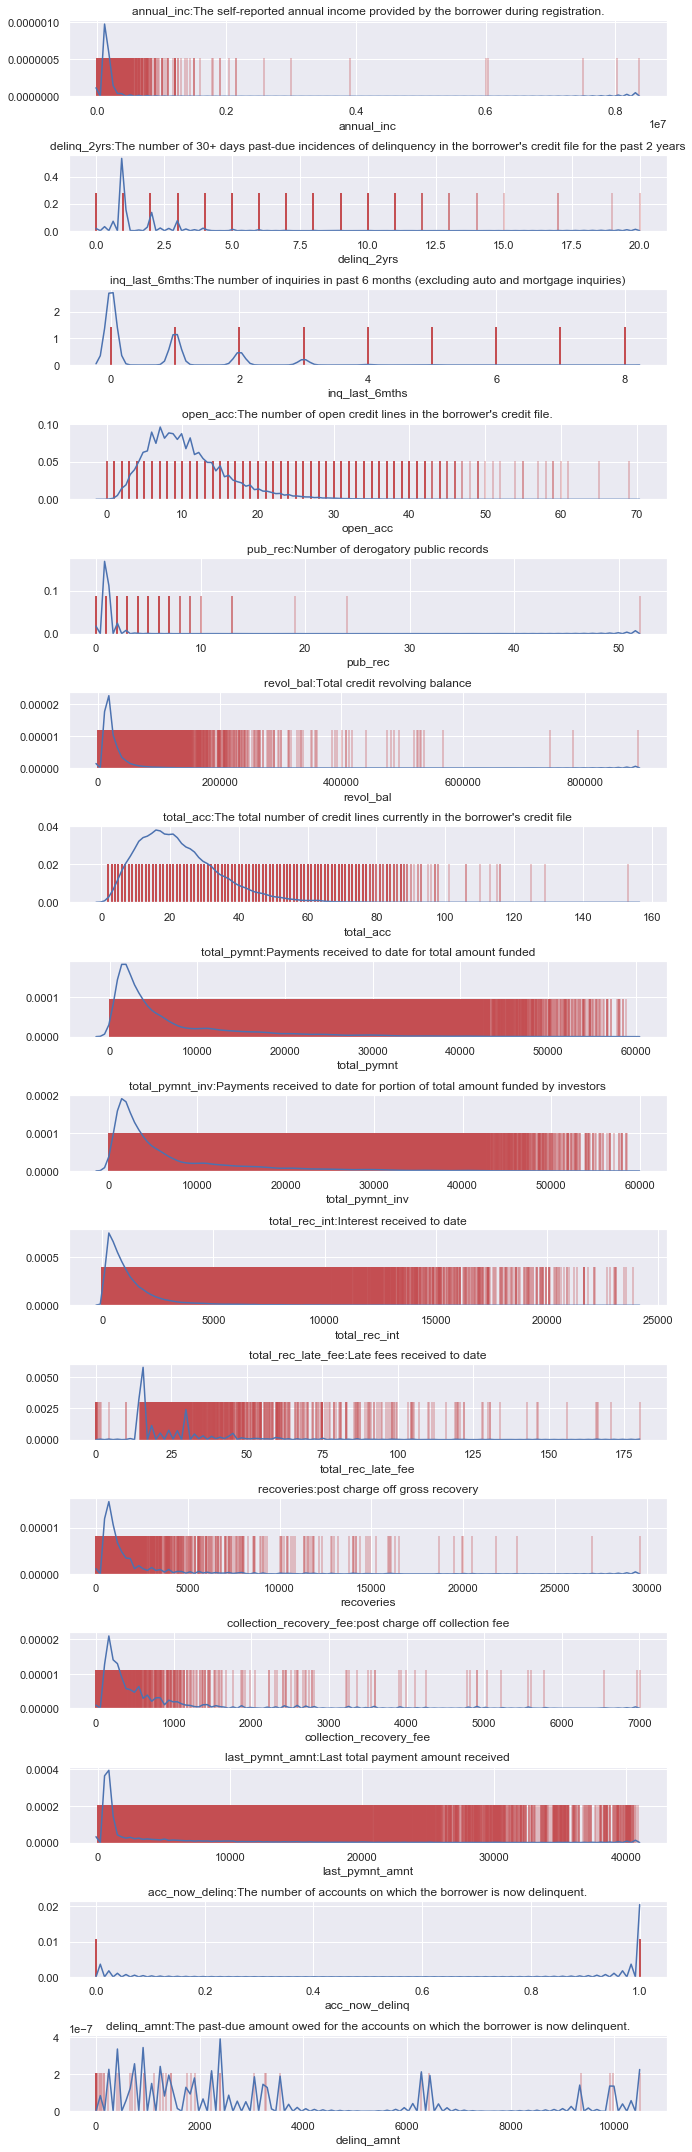

In [18]:
fig, axes = plt.subplots(len(outlier_cols), figsize = (10,30))
for idx, ax in enumerate(axes):
    sns.distplot(numeric_data[outlier_cols[idx]], 
                 hist=False,
                 ax=ax,
                 rug = True,
                 rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.5 }

                )
    ax.set_title("{}:{}".format(outlier_cols[idx],data_dict[outlier_cols[idx]]))
fig.tight_layout()

The only outlier that looks particularly strange is the large value of ~55 for `pub_rec`. I will remove it

In [19]:
numeric_data[numeric_data.pub_rec > 50]

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,settlement_amount,settlement_percentage,settlement_term
85452,15000,15000,15000.0,538.31,74000.0,29.44,0,1,48.0,24.0,22,52,24238,30,13009.15,13009.15,3200.74,3200.74,1990.85,1209.89,0.0,0.0,0.0,538.31,0.0,NaN,NaN,NaN,0,0.0,128514.0,3.0,2.0,0.0,0.0,35.0,25576.0,4.0,7.0,11.0,3388.0,43.0,43000.0,0.0,3.0,3.0,11.0,5842.0,4977.0,74.3,0.0,0,174.0,159.0,3.0,3.0,2.0,3.0,NaN,1.0,NaN,0.0,10.0,16.0,10.0,11.0,6.0,18.0,22.0,16.0,22.0,0.0,0.0,7.0,93.3,70.0,0.0,52.0,195823.0,49814.0,19400.0,57723.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
numeric_data = numeric_data[numeric_data.pub_rec < 50]